# Calibration

The aim is to find the slope between sensor readout (μS/cm) and concentration (g/l) for each sensor

In [1]:
bucketsize = 1.0 # calibration bucket size in liters
solution_conc = 1.0 # calibration solution concentration (g/l)

1.0

Total calibration ml solution vs sensor readout (μS/cm) for each sensor
Example from 2021:

In [2]:
calibrations = Dict(309=>[ ## sensor 309
                             # first calibration
                          [ 0 0.54 ## First row needs to be the background reading!
                            1 1.35
                            5 4.7
                            10 9.7],
                             # second calibration
                          [ 0 1.6
                            1 2.43
                            2 3.34
                            5 6.23
                            10 12.3
                            20 28.6 ],
                          ],
                    145=>[## sensor 145
                            [ 0 0.31 ## First row needs to be the background reading!
                              1 1.03
                              5 4.29
                              10 9.9 ],
                            [ 0 1.21
                              1 2.14
                              2 3.03
                              5 5.88
                              10 11.83 ],
                            ],
                    :wtw=>[[0 1.4
                            1 2.7]],
                    # add more:
                    # 049=>[],
                    ##:999=>[], ## etc
                    )

Dict{Any, Vector{Matrix{Float64}}} with 3 entries:
  145  => [[0.0 0.31; 1.0 1.03; 5.0 4.29; 10.0 9.9], [0.0 1.21; 1.0 2.14; … ; 5…
  309  => [[0.0 0.54; 1.0 1.35; 5.0 4.7; 10.0 9.7], [0.0 1.6; 1.0 2.43; … ; 10.…
  :wtw => [[0.0 1.4; 1.0 2.7]]

Convert ml solution added to concentration

In [3]:
"""
Converts ml added to bucket to a concentration (g/l == kg/m^3).

Input:

- ml -- how many mililiters were added
- solution_conc -- the concentration of the calibration solution (kg/m^3 == g/l)
- bucketsize -- the size of the bucket/bottle to which the solution was added (l)

Output:

- concentration (kg/m^3 == g/l)
"""
function ml_to_concentration(ml, solution_conc, bucketsize)
    mass = ml/1e3 * solution_conc # salt mass added to bucket (g)
    return mass/bucketsize # concentration in g/l (== kg/m^3)
end

Main.var"##227".ml_to_concentration

An example, convert to concentration (g/l):

In [4]:
ml_to_concentration(calibrations[309][1][:,1], solution_conc, bucketsize)

4-element Vector{Float64}:
 0.0
 0.001
 0.005
 0.01

Now fit a linear function to it.  The function is pre-defined in the file helper_functions.jl with
name `fit_calibration`.

In [5]:
using NBInclude
@nbinclude("helper_functions.ipynb")

delta_cond2conc = Dict(a[1] => fit_calibration(bucketsize, solution_conc, a[2]...) for a in pairs(calibrations))

Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.00101±6.89e-5

Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.000812±9.9e-5

Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.000769±2.59e-15



Dict{Any, Main.var"##227".var"#1#3"{LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}, Main.var"##227".var"#fn#2"}} with 3 entries:
  145  => #1
  309  => #1
  :wtw => #1

Plot them

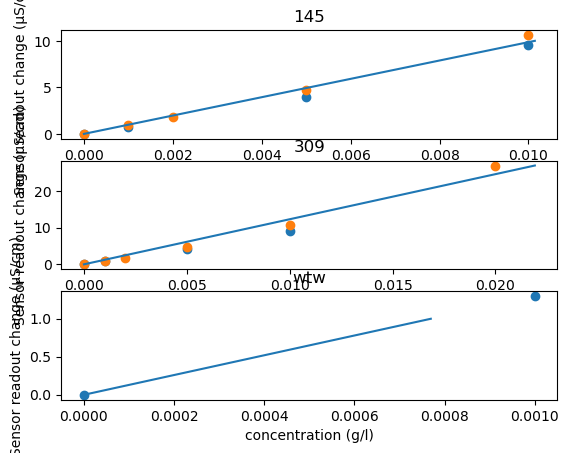

In [6]:
using PyPlot

# Note if you want a zoom-able plot opening in a new window do:
# `pygui(true)`
# to go back to in-line plots do:
pygui(false)

fig = figure()
for (i,sens) in enumerate(keys(delta_cond2conc))
    subplot(length(delta_cond2conc), 1, i)
    delta_fn = delta_cond2conc[sens]
    calis = calibrations[sens]
    # scatter plots (x,y) points
    maxreadout = 0
    for cali in calis
        conc = ml_to_concentration(cali[:,1], solution_conc, bucketsize)
        maxreadout = max(maxreadout, maximum(cali[:,2].-cali[1,2]))
        scatter(conc, cali[:,2].-cali[1,2],
                label="Calibration 1")
    end
    xlabel("concentration (g/l)")
    ylabel("Sensor readout change (μS/cm)")

    # Now plot the line of best fit:
    readouts = 0:maxreadout
    # (plot plots a line)
    plot(delta_fn(readouts), readouts, label="line of best fit")
    title(sens)
end

# mkpath("../plots")
# savefig("../plots/calibration.png") # to save this figure to a file, useful for your presentation

# return `fig` to show it in notebook
fig

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*